# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Zaina Abushaban


In [2]:
# imports
import numpy as np
import pandas as pd
from sqlite3 import connect
import sqlite3


# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>

Client Table:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| Client_ID     | PK, int                          |
| Email     | string                          |
| Name     | string                          |
| Phone_Num     | string                         |


Airlines Table:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| Airline_ID     | PK, int                          |
| Airline_Name     | string                          |

Flights Table:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| Flight_ID     | PK, int                          |
| Airline_ID     | FK, int                          |
| Dep_City     | string                          |
| Destination     | string                          |
| date     | datetime                          |

Hotel Table:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| Hotel_ID     | PK, int                          |
| Hotel_Name     | string                          |
| Location     | string                          |
| Rating     | int                          |


Bookings Table:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| Booking_ID     | PK, int                          |
| Airline_ID     | FK, int                          |
| Hotel_ID     | FK, int                          |
| Flight_Time    | datetime                          |

Feedback Table:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| Feedback_ID     | PK, int                          |
| Client_ID     | FK, int                          |
| Hotel_ID     | FK, int                          |
| Airline_ID     | FK, int                          |
| text     | string                          |


In [3]:

BookingDetailsDf = pd.read_csv('BookingDetails.csv')

conn = sqlite3.connect('travel.db')
cursor = conn.cursor()

#The Client table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Client(
        CustomerID INTEGER PRIMARY KEY UNIQUE,
        CustomerName TEXT,
        CustomerEmail TEXT,
        CustomerPhone TEXT
    );
''')

unique_clients_df = BookingDetailsDf[['CustomerID', 'CustomerName', 'CustomerEmail', 'CustomerPhone']].drop_duplicates()
unique_clients_df.to_sql("Client", conn, if_exists="replace", index=False)



501

In [4]:
#The Airlines table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Airlines(
        AirlineID INTEGER PRIMARY KEY UNIQUE,
        AirlineName TEXT
    );
''')

unique_airlines_df = BookingDetailsDf[['AirlineID', 'AirlineName']].drop_duplicates().dropna()
unique_airlines_df.to_sql("Airlines", conn, if_exists="replace", index=False)


10

In [5]:

#The Flights table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Flights (
        FlightID INTEGER PRIMARY KEY UNIQUE,
        AirlineID INTEGER,
        Flight_Departure TEXT,
        Flight_Destination TEXT,
        Flight_Date DATETIME,
        FOREIGN KEY (AirlineID) REFERENCES Airlines(AirlineID)

    )
''')

unique_flights_df = BookingDetailsDf[['FlightID', 'AirlineName', 'Flight_Departure', 'Flight_Destination', 'Flight_Date']].drop_duplicates().dropna()
unique_flights_df.to_sql("Flights", conn, if_exists="replace", index=False)



99

In [6]:
#The Hotels table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Hotels(
        HotelID INTEGER PRIMARY KEY UNIQUE,
        HotelName TEXT,
        HotelLocation TEXT,
        HotelRating INT
    );
''')

unique_hotels_df = BookingDetailsDf[['HotelID', 'HotelName','HotelLocation','HotelRating']].drop_duplicates().dropna()
unique_hotels_df.to_sql("Hotels", conn, if_exists="replace", index=False)




50

In [7]:
#The Bookings table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Bookings(
        BookingID INTEGER PRIMARY KEY UNIQUE,
        AirlineID INTEGER,
        CustomerID INTEGER,
        HotelID INTEGER,       
        Flight_Date DATETIME,
        FOREIGN KEY (CustomerID) REFERENCES Client(CustomerID),    
        FOREIGN KEY (AirlineID) REFERENCES Airlines(AirlineID),
        FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID)       
    );
''')

unique_bookings_df = BookingDetailsDf[['BookingID', 'AirlineID','HotelID','Flight_Date','CustomerID']].drop_duplicates()
unique_bookings_df.to_sql("Bookings", conn, if_exists="replace", index=False)

conn.commit()

In [8]:
#The feedback table
FeedbackDetailsDf = pd.read_csv('FeedbackDetails.csv')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Feedback(
        FeedbackID INTEGER PRIMARY KEY UNIQUE,
        CustomerID INTEGER,
        HotelID INTEGER,       
        AirlineID INTEGER,
        Review TEXT,
        FOREIGN KEY (CustomerID) REFERENCES Client(CustomerID),
        FOREIGN KEY (AirlineID) REFERENCES Airlines(AirlineID),
        FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID)       
    );
''')
unique_feedback_df = FeedbackDetailsDf[['FeedbackID', 'AirlineID','HotelID','CustomerID','Review']].drop_duplicates()
unique_feedback_df.to_sql("Feedback", conn, if_exists="replace", index=False)

conn.commit()


## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [9]:
cursor.execute('''
    SELECT H.HotelName, COUNT(B.HotelID)
    FROM Bookings AS B
    JOIN Hotels AS H ON B.HotelID = H.HotelID
    GROUP BY B.HotelID
''')
result = cursor.fetchall()
result

[('Opal Motel', 11),
 ('Diamond Plaza', 6),
 ('Golden Suites', 16),
 ('Silver Villa', 10),
 ('Emerald Motel', 15),
 ('Sapphire Villa', 14),
 ('Jade Motel', 5),
 ('Jade Suites', 7),
 ('Pearl Resort', 12),
 ('Emerald Resort', 9),
 ('Golden Inn', 14),
 ('Jade Resort', 11),
 ('Silver Palace', 8),
 ('Silver Resort', 15),
 ('Diamond Villa', 10),
 ('Sapphire Villa', 8),
 ('Diamond Resort', 15),
 ('Pearl Hideaway', 8),
 ('Opal Suites', 9),
 ('Golden Retreat', 7),
 ('Opal Plaza', 10),
 ('Ruby Hideaway', 8),
 ('Opal Inn', 4),
 ('Diamond Inn', 14),
 ('Jade Suites', 10),
 ('Sapphire Hideaway', 10),
 ('Pearl Lodge', 5),
 ('Golden Resort', 12),
 ('Diamond Suites', 10),
 ('Golden Resort', 6),
 ('Jade Lodge', 9),
 ('Golden Hideaway', 9),
 ('Opal Motel', 4),
 ('Diamond Inn', 15),
 ('Ruby Plaza', 8),
 ('Ruby Palace', 8),
 ('Jade Retreat', 9),
 ('Pearl Motel', 7),
 ('Crystal Motel', 11),
 ('Sapphire Suites', 11),
 ('Silver Hideaway', 11),
 ('Pearl Plaza', 8),
 ('Golden Villa', 10),
 ('Diamond Inn', 14),


## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [10]:
#First we'll get the IDs of customers that gave a hotel a rating.
cursor.execute('''
    SELECT CustomerID
    FROM Feedback
    WHERE HotelID IS NOT NULL;
    ''')
rated_hotels=set(cursor.fetchall())

#Then we do the same for customers that gave an airline a rating.
cursor.execute('''
    SELECT CustomerID
    FROM Feedback
    WHERE AirlineID IS NOT NULL;
    ''')
rated_airlines=set(cursor.fetchall())

#Now we get their intersection, and put JUST the ids in a list:
rated_both= [item[0] for item in(rated_airlines.intersection(rated_hotels))]

#We make a placeholder to be able to pass it in:
placeholders = ', '.join(['?'] * len(rated_both))

#Now we use this to get the names and contact details:
cursor.execute(f'''
    SELECT CustomerID,CustomerName,CustomerEmail,CustomerPhone
    FROM Client
    WHERE CustomerID IN ({placeholders})
    ''',rated_both)
cursor.fetchall()

[(6148, 'Ethan Martinez', 'ethan.martinez@mail.com', '555-3339628'),
 (4149, 'Sophia Davis', 'sophia.davis@mail.com', '555-7585879'),
 (8247, 'Liam Miller', 'liam.miller@mail.com', '555-3750839'),
 (8292, 'Mason Brown', 'mason.brown@mail.com', '555-4291570'),
 (6260, 'Ethan Smith', 'ethan.smith@mail.com', '555-4014268'),
 (4253, 'Olivia Martinez', 'olivia.martinez@mail.com', '555-3255322'),
 (8379, 'Liam Brown', 'liam.brown@mail.com', '555-3328325'),
 (8380, 'Olivia Miller', 'olivia.miller@mail.com', '555-7935514'),
 (6337, 'Ethan Rodriguez', 'ethan.rodriguez@mail.com', '555-7714590'),
 (4290, 'Liam Martinez', 'liam.martinez@mail.com', '555-3004787'),
 (8410, 'Mason Brown', 'mason.brown@mail.com', '555-0826096'),
 (4317, 'Ethan Miller', 'ethan.miller@mail.com', '555-7366655'),
 (6383, 'Mia Williams', 'mia.williams@mail.com', '555-4798996'),
 (4353, 'John Smith', 'john.smith@mail.com', '555-3493476'),
 (6407, 'Emma Smith', 'emma.smith@mail.com', '555-0707146'),
 (8480, 'Mason Brown', 'm

## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [11]:
# Getting the average
cursor.execute('''
    SELECT AVG(HotelRating)
    FROM Hotels
''')
average=float(cursor.fetchone()[0])
#Getting the htoels with a rating lower than the average
cursor.execute('''
    SELECT HotelName,HotelRating
    FROM Hotels
    WHERE HotelRating<?;
''',(average,))
result=cursor.fetchall()
result


3.2


[('Pearl Resort', 2.0),
 ('Golden Resort', 3.0),
 ('Ruby Palace', 1.0),
 ('Golden Resort', 1.0),
 ('Golden Villa', 3.0),
 ('Sapphire Suites', 2.0),
 ('Opal Plaza', 2.0),
 ('Diamond Plaza', 2.0),
 ('Diamond Inn', 2.0),
 ('Golden Hideaway', 3.0),
 ('Jade Resort', 2.0),
 ('Golden Inn', 3.0),
 ('Golden Lodge', 2.0),
 ('Jade Motel', 2.0),
 ('Sapphire Villa', 2.0),
 ('Opal Suites', 1.0),
 ('Opal Inn', 1.0),
 ('Pearl Lodge', 1.0),
 ('Pearl Plaza', 2.0),
 ('Emerald Resort', 3.0),
 ('Silver Palace', 2.0),
 ('Pearl Hideaway', 1.0),
 ('Opal Motel', 1.0),
 ('Ruby Resort', 3.0),
 ('Golden Plaza', 2.0),
 ('Opal Motel', 2.0),
 ('Pearl Motel', 3.0)]

## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [12]:
#First: Stayed in at least three different hotels
cursor.execute('''
SELECT CustomerID
FROM Bookings
GROUP BY CustomerID
HAVING COUNT(DISTINCT HotelID) >=3;''')
hotels3=set(cursor.fetchall())

#Second: flown with at least two different airlines
cursor.execute('''
SELECT CustomerID
FROM Bookings
GROUP BY CustomerID
HAVING COUNT(DISTINCT AirlineID) >=2;''')
airlines2=set(cursor.fetchall())

#Both:
both= [item[0] for item in(airlines2.intersection(hotels3))]

#We make a placeholder to be able to pass it in:
placeholders = ', '.join(['?'] * len(both))

#Now we use this to get the names and contact details:
cursor.execute(f'''
    SELECT B.CustomerID,C.CustomerName, COUNT(B.CustomerID)
    FROM Bookings AS B
    JOIN Client AS C on C.CustomerID= B.CustomerID
    WHERE B.CustomerID IN ({placeholders})
    GROUP BY C.CustomerID
    ''',both)
cursor.fetchall()


[]

## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [13]:
#First: Stayed in at least three different hotels
cursor.execute('''
SELECT DISTINCT B1.CustomerID
FROM Bookings B1
JOIN Bookings B2 ON B1.CustomerID = B2.CustomerID
JOIN Bookings B3 ON B1.CustomerID = B3.CustomerID
WHERE B1.HOTELID != B2.HOTELID
AND B2.HOTELID != B3.HOTELID
AND B1.HOTELID != B3.HOTELID 
AND B2.HOTELID IS NOT NULL
AND B1.HOTELID IS NOT NULL
AND B3.HOTELID IS NOT NULL;
''')
hotels3=set(cursor.fetchall())

cursor.execute('''
SELECT DISTINCT B1.CustomerID
FROM Bookings B1
JOIN Bookings B2 ON B1.CustomerID = B2.CustomerID
WHERE B1.AirlineID != B2.AirlineID
AND B2.AirlineID IS NOT NULL
AND B1.AirlineID IS NOT NULL
''')
airlines2=set(cursor.fetchall())

#Both:
both= [item[0] for item in(airlines2.intersection(hotels3))]

#We make a placeholder to be able to pass it in:
placeholders = ', '.join(['?'] * len(both))

#Now we use this to get the names and contact details:
cursor.execute(f'''
    SELECT C.CustomerName, COUNT(B.CustomerID)
    FROM Bookings AS B
    JOIN Client AS C on C.CustomerID= B.CustomerID
    WHERE B.CustomerID IN ({placeholders})
    GROUP BY C.CustomerID
    ''',both)
cursor.fetchall()

[]

# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [14]:
import seaborn as sns
df = pd.read_csv('titanic.csv')
df.pivot_table('Survived', index='Sex', columns='Pclass')


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Generally a higher survival rate for women, following the "Ladies first" rule is always appreciated.
Secondly we notice people of the third class have a significantly lower survival rate.

## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


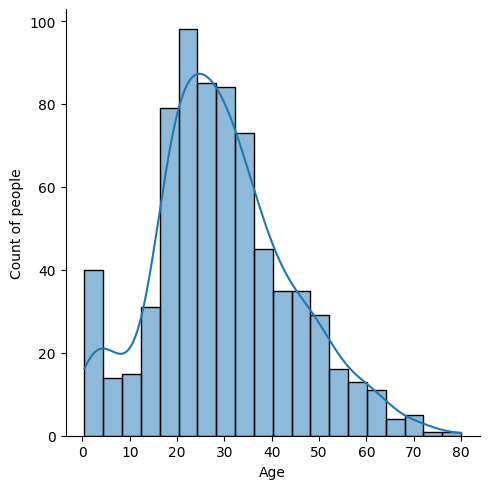

In [15]:
plot=sns.displot(df, x="Age",kde=True)
plot.set_axis_labels(y_var="Count of people")


The most common age was late 20s to early 30s, which makes sense, most of these people were seeking a fun getaway on the biggest most luxurious ship in the world at that time.

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

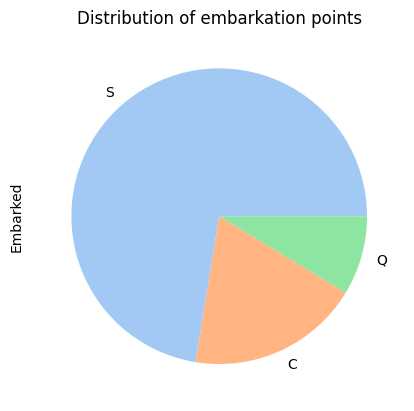

In [16]:
import matplotlib.pyplot as plt

embarked = df['Embarked'].value_counts()

colors = sns.color_palette('pastel')[0:5]

plot = embarked.plot.pie(labels=embarked.index, colors=colors)
plt.title('Distribution of embarkation points')
plt.show()


Text(0.5, 1.0, 'Embarkation details at S')

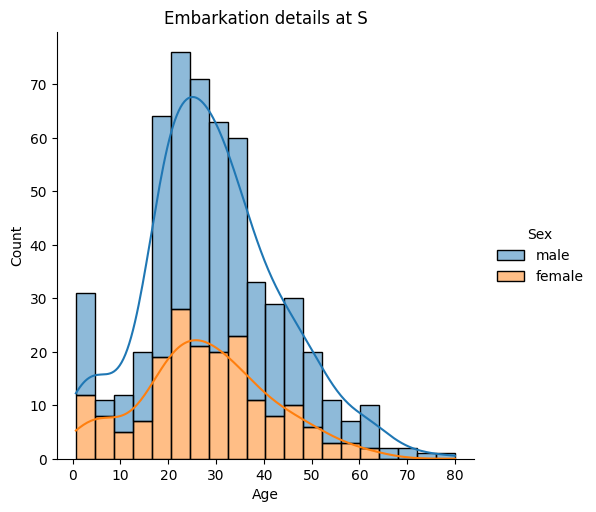

In [17]:
#So, S is the most common embarkation point.
sns.displot(df[df["Embarked"] == "S"], x="Age", hue="Sex", kde=True, multiple="stack")
plt.title('Embarkation details at S')


I'm guessing we should see if this reflects the women and children first policy for *Embarkation*, which I'm not really noticing here.
On the contrary, most embarkers are males from 20-40.

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

Text(0.5, 1.0, 'Age and Fare Scatter Plot')

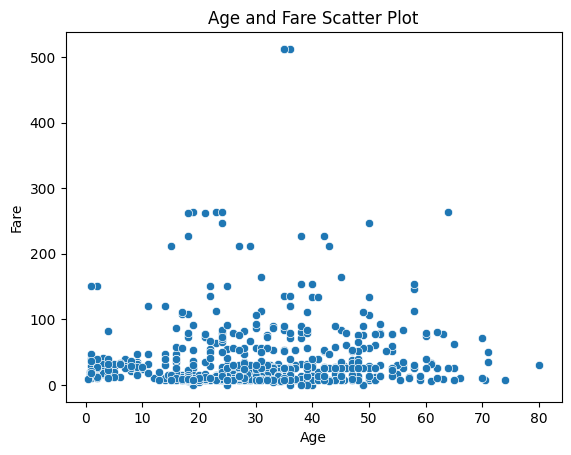

In [18]:
sns.scatterplot(data=df, x='Age', y='Fare')
plt.title('Age and Fare Scatter Plot')


Not really seeing any correlation, the prices seem to have something else affecting their variablity.

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


/var/folders/9r/709f9hv15p1fs41s6_994hmc0000gn/T/ipykernel_1207/2703422795.py:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(data=grouped, x='Pclass', y='Fare', hue='Embarked', palette=colors)


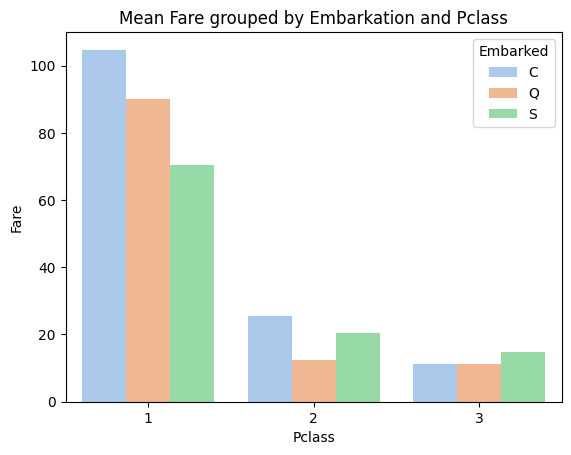

In [19]:

grouped = df.groupby(['Pclass', 'Embarked'])['Fare'].mean().reset_index()

sns.barplot(data=grouped, x='Pclass', y='Fare', hue='Embarked', palette=colors)

plt.title('Mean Fare grouped by Embarkation and Pclass')
plt.show()


Class 1 has the highest fare, almost triple other classes.
When it comes to embarkation ports C is the highest fare, then Q then S.

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
